In [39]:
import numpy as np
from skimage import io, data, filters, util, color, transform, exposure, measure
from skimage.util import img_as_float, img_as_uint, img_as_ubyte
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, svm, datasets
from sklearn.model_selection import train_test_split


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [2]:
X = np.array([1,2,3])
x = np.insert(X, 2, 10)
print(X)
print(x)

[1 2 3]
[ 1  2 10  3]


### Rede Neural Artificial

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/redes_neurais.jpeg?raw=1" alt="redes neurais" style="width: 500px;"/>


## Como a rede neural aprende?

<p>
Cada neurônio contém uma função de ativação (<i style="color:yellow">activation function</i>) que processa uma combinação linear dos inputs e pesos sinápticos, resultando na geração de um sinal de saída.</p>

<p>
    <ol>
    <li>A informação segue um fluxo da camada de entrada (<i style="color:yellow">input layer</i>) para as camadas ocultas (<i style="color:yellow">hidden layers</i>) e, finalmente, para a camada de saída (output layer). Durante esse fluxo, os dados de entrada da camada de entrada são fornecidos aos neurônios das camadas ocultas, que, por sua vez, alimentam o neurônio final da camada de saída.</li>
    <li>A primeira etapa na propagação de informações através da rede geralmente é realizada com parâmetros aleatórios para as funções de ativação dos neurônios.</li>
    <li>Durante a propagação (<i style="color:yellow">feed forward</i>), os neurônios da camada de saída produzem sinais de saída.</li>
    <li>
    Após a propagação, a função de custo, que é uma métrica de erro, é calculada. Em seguida, o modelo ajusta os parâmetros dos neurônios na direção de um menor custo, utilizando o gradiente, que é uma derivada multivariada.</li>
    <li>
    Esse algoritmo é conhecido como retropropagação (<i style="color:yellow">Backpropagation</i>). A cada execução do algoritmo, chamamos de época (<i style="color:yellow">epoch</i>), uma nova propagação é realizada e uma nova função de custo é calculada. Além disso, os parâmetros dos neurônios são atualizados.</li>
    <li>
    O treinamento/aprendizado da rede neural é encerrado quando as épocas definidas são concluídas.</li>
    </ol>
</p>


## Funções de Ativação

| **Sigmoid**                                                  | **Tanh**                                                     | **ReLU**                                                     | **Leaky ReLU**                                               |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| $g(z)=\frac{1}{1+e^{-z}}$                                    | $g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$                     | $g(z)=\max (0, z)$                                           | $\begin{array}{c}{g(z)=\max (\epsilon z, z)} \\ {\text { com } \epsilon \ll 1}\end{array}$ |
| ![Illustration](https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/sigmoid.png?raw=1) | ![Illustration](https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/tanh.png?raw=1) | ![Illustration](https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/relu.png?raw=1) | ![Illustration](https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/leaky-relu.png?raw=1) |

### Rede Neural em Sklearn


<p>
<b>class sklearn.neural_network.MLPClassifier</b>(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)</p>

<p>
<b> Parameters </b>
<ul>
    <li>hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,). The ith element represents the number of neurons in the ith hidden layer.</li>
    <li>activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’. Activation function for the hidden layer.</li>
        <ul>
            <li> ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x </li>
            <li> ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).</li>
            <li> ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).</li>
            <li> ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)</li>
        </ul>
    <li>solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’. The solver for weight optimization. </li>
        <ul>
            <li> ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.</li>
            <li> ‘sgd’ refers to stochastic gradient descent.</li>
            <li> ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba</li>
        </ul>
    <li>alpha: float, default=0.0001. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.</li>
    <li>batch_size: int, default=’auto’. Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples).</li>    
    <li> learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’. Learning rate schedule for weight updates.</li>
        <ul>
            <li> ‘constant’ is a constant learning rate given by ‘learning_rate_init’.</li>
            <li> ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)</li>
            <li> ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.</li>
        </ul>
        Only used when solver='sgd'.
    <li>learning_rate_init: float, default=0.001. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.</li>
    <li>max_iter: int, default=200. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.</li>
    <li>shuffle: bool, default=True. Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.</li>
    <li>random_state: int, RandomState instance, default=None. Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. Pass an int for reproducible results across multiple function calls.</li>
    <li>early_stopping: bool, default=False. Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. If early stopping is False, then the training stops when the training loss does not improve by more than tol for n_iter_no_change consecutive passes over the training set. Only effective when solver=’sgd’ or ‘adam’.</li>
    <li>validation_fraction: float, default=0.1. The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.</li>    
</ul>
</p>

<p>
<b> Attributes </b>
<ul>
    <li>classes_: ndarray or list of ndarray of shape (n_classes,). Class labels for each output.</li>
    <li>loss_: float. The current loss computed with the loss function.</li>
    <li>best_loss_: float or None. The minimum loss reached by the solver throughout fitting. If early_stopping=True, this attribute is set ot None. Refer to the best_validation_score_ fitted attribute instead.</li>
    <li>loss_curve_: list of shape (n_iter_,). The ith element in the list represents the loss at the ith iteration.</li>    
    <li>validation_scores_: list of shape (n_iter_,) or None. The score at each iteration on a held-out validation set. The score reported is the accuracy score. Only available if early_stopping=True, otherwise the attribute is set to None.</li>
    <li>best_validation_score_:float or None. The best validation score (i.e. accuracy score) that triggered the early stopping. Only available if early_stopping=True, otherwise the attribute is set to None.</li>
    <li>t_: int. The number of training samples seen by the solver during fitting.</li>
    <li>coefs_: list of shape (n_layers - 1,). The ith element in the list represents the weight matrix corresponding to layer i.</li>
    <li>intercepts_: list of shape (n_layers - 1,). The ith element in the list represents the bias vector corresponding to layer i + 1.</li>
    <li>n_features_in_: int. Number of features seen during fit. New in version 0.24.</li>
    <li>feature_names_in_: ndarray of shape (n_features_in_,). Names of features seen during fit. Defined only when X has feature names that are all strings. New in version 1.0.</li>    
    <li>n_iter_: int. The number of iterations the solver has run.</li>
    <li>n_layers_: int. Number of layers.</li> 
    <li>n_outputs_: int. Number of outputs.</li>
    <li>out_activation_: str. Name of the output activation function.</li> 
</ul>
</p>


## Terminología Machine Learning

<ul>
  <li>Cada linha é uma observação (também conhecida como: amostra, exemplo, instância, registro - <i> sample, example, instance, record</i>)</li>
  <li>Cada coluna é um característica (também conhecido como: preditor, atributo, variável independente, entrada, regressor, covariável - <i>predictor, attribute, independent variable, input, regressor, covariate</i>)</li>
</ul>

## Requisitos para trabalhar com dados no scikit-learn
<ul>
  <li>Características (atributos) e etiquetas são objetos separados</li>
  <li>As características e etiquetas devem ser numéricos</li>
  <li>As características e etiquetas devem ser matrizes NumPy</li>
  <li>As características e etiquetas devem ter formas específicas</li>
</ul>

## Padrão de modelagem de 4 etapas scikit-learn

<b>Passo 1</b>: importe a classe que você planeja usar

<b>Passo 2</b>: "Instanciar" o "estimador"
<ul>
  <li>"Estimator" é o termo do scikit-learn para modelo</li>
  <li>"Instanciar" significa "criar uma instância de"</li>
  <li>O nome do objeto não importa</li>
  <li>Pode especificar parâmetros de ajuste (também conhecidos como "hiperparâmetros") durante esta etapa</li>
  <li>Todos os parâmetros não especificados são definidos para seus padrões</li>

</ul>

<b>Passo 3</b>: ajustar o modelo com os dados (também conhecido como "treinamento de modelo"). <b>Não esqueça de normalizar os dados</b>
<ul>
  <li>O modelo está aprendendo a relação entre <i>X</i> e <i>y</i></li>
  <li>O treino acontece no proprio objeto</li>
</ul>

<b>Passo 4</b>: predizer a resposta para uma nova observação
<ul>
  <li>Novas observações são chamadas de dados "fora da amostra"</li>
  <li>Usa as informações que aprendeu durante o processo de treinamento do modelo</li>
</ul>

In [40]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

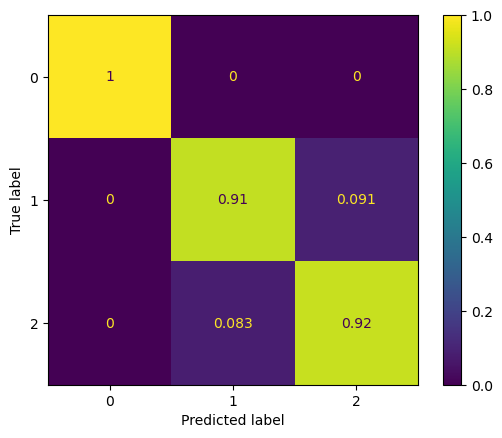

In [41]:
# Passo 1, importar biblioteca
from sklearn.neural_network import MLPClassifier

# Passo 2, instanciar o classificador
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)

# Passo 3, ajustar o modelo com os dados.
# 3.1 Normalizar os dados
minmax_scaler = preprocessing.MinMaxScaler().fit(X)
X_new = minmax_scaler.transform(X)
# 3.2 Particionar o conjunto em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
# 3.3 Treinar
clf.fit(x_train, y_train)

# Passo 4, avaliar o modelo
y_pred=clf.predict(x_test)
matriz = metrics.confusion_matrix(y_test, y_pred)
tot = np.sum(matriz, axis=1, keepdims=True) 
np.set_printoptions(precision=2)
m_porc = matriz/tot
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m_porc, display_labels=[0,1,2])
disp.plot()
plt.show()

Numero de classes: [0 1 2]
Melhor loss: 0.037741386588213306
Epocas de treino: 169
Numero de camadas: 6


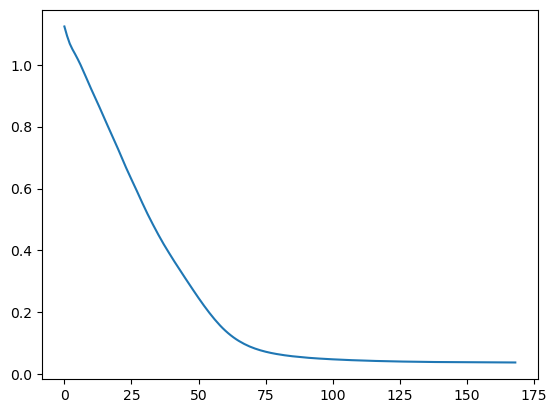

In [25]:
print(f'Numero de classes: {clf.classes_}')
print(f'Melhor loss: {clf.best_loss_}')
print(f'Epocas de treino: {clf.n_iter_}')
print(f'Numero de camadas: {clf.n_layers_}')
plt.plot(clf.loss_curve_)



# Pytorch
[**PyTorch**](https://www.pytorch.org/) é uma biblioteca de código aberto para aprendizado de máquina aplicável a uma ampla variedade de tarefas. Foi criada pelo **Facebook** em 2016 é a principal biblioteca para criação e treinamento de redes neurais artificiais. A API toda é escrita em Python mas é executada em C++ na CPU ou em CUDA/ROCM na GPU.

### Estruturação dos módulos de PyTorch

```python
import torch
```
* [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) - Tensores (arrays N-D)
* [`torch.nn`](https://pytorch.org/docs/stable/nn.html) - Redes Neurais (_**N**eural **N**etworks_)
* [`torch.optim`](https://pytorch.org/docs/stable/optim.html) - Otimização (_**Optim**ization_)
* [`torch.data`](https://pytorch.org/docs/stable/data.html) - *Datasets* e Ferramentas de Streaming de Dados
* [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) - Diferenciação Automática (_**Auto**matic Differentiation_)
* [`torch.vision`](https://pytorch.org/docs/stable/torchvision/index.html) - Ferramentas de Manipulação de Imagens e Visão Computacional
* [`torch.audio`](https://pytorch.org/audio/stable/index.html) - Ferramentas de Manipulação de Áudio
* [`torch.jit`](https://pytorch.org/docs/stable/jit.html) - Compilação _**j**ust-**i**n-**t**ime_ de modelos PyTorch em binários

## Algoritmos de Otimização

PyTorch possui diversos:
* **SGD**: _**S**tochastic **G**radient **D**escent_
* **SGD com Momento**: SGD com Momento usando a derivada (ou gradiente) do ponto atual
* **SGD com Momento Nesterov**: SGD com Momento mas  usa a derivada (ou o gradiente) parcial do ponto seguinte (Nesterov, 1983)
* **RMSprop**: SGD com taxa de aprendizagem adaptativa  (Hinton, Srivastava & Swersky, 2012) - `RMSProp`
* **AdaGrad**: SGD com taxa de aprendizagem adaptativa (Duchi, Hazan, & Yoram, 2011) -  `AdaGrad`
* **Adam**: SGD com taxa de aprendizagem adaptativa e momento (Kingma, Diederick & Jimmy, 2014) - `ADAM`

Os mais importantes são o SGD e o Adam

### Funcões Custo de Classificação

Mais utilizadas


* *Binary Cross-entropy* (Entropia cruzada binária): [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
* *Categorical Cross-entropy - Negative Log-Likelihood Loss* (Entropia cruzada categórica): [`torch.nn.NLLLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html)

# Formato para criar uma Rede Neural
<p>O formato para criar uma rede neural usando o método de classe é o seguinte</p>
<!--
<table><tr>
<td> <img src="https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1BGJbV6sXNNlt2PmIZ7RCyHpQfPRpZgJ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1d3bAvzHJ5wRwPxIXGZXiUhP7bA5o0SbY" alt="Drawing"  width="300"/> </td>
</tr></table>
-->
<img src="ClassRNA.png" alt="Drawing"  width="400"/>

<p>No método <i>__init()__</i> são definidas as camadas e outras variáveis e no método <i>forward()</i> é definido como os dados fluem através das camadas.</p>



In [42]:
import torch
from torch import nn
import torch.nn.functional as F

In [43]:
X_train = torch.tensor(x_train, dtype=torch.float32)
X_test = torch.tensor(x_test, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.long)
Y_test = torch.tensor(y_test, dtype=torch.long)

In [28]:
class Modelo(nn.Module):
    def __init__(self,entrada=4,camada_escondida1=14,camada_escondida2=49,saida=3):
        super().__init__()
        self.fc1 = nn.Linear(entrada,camada_escondida1)
        self.fc2 = nn.Linear(camada_escondida1, camada_escondida2)
        self.out = nn.Linear(camada_escondida2, saida)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

### Instanciando uma rede

In [29]:
modelo_classificacao = Modelo(entrada=4,camada_escondida1=14,camada_escondida2=49,saida=3)

### Função de perda (*Loss function*)

In [44]:
funcao_objetivo = nn.CrossEntropyLoss()
# Loss
#funcao_objetivo = nn.BCELoss()

### Função de otimização

In [31]:
otimizador = torch.optim.Adam(modelo_classificacao.parameters(), lr=0.01)
# Optimizer
#otimizador = torch.optim.Adagrad( model.parameters() )

# Treinamento

In [32]:
epocas = 100
custos = []
for i in range(epocas):
  # zerar os gradientes
  otimizador.zero_grad()

  # forward pass
  #y_predito = modelo_classificacao.forward(X_train)
  y_predito = modelo_classificacao(X_train)
  custo = funcao_objetivo(y_predito, Y_train)

  # backward pass
  custo.backward()
  otimizador.step()

  custos.append(custo.item())

# Teste

In [33]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_predito = modelo_classificacao.forward(val)
        preds.append(y_predito.argmax().item())

# Avaliação

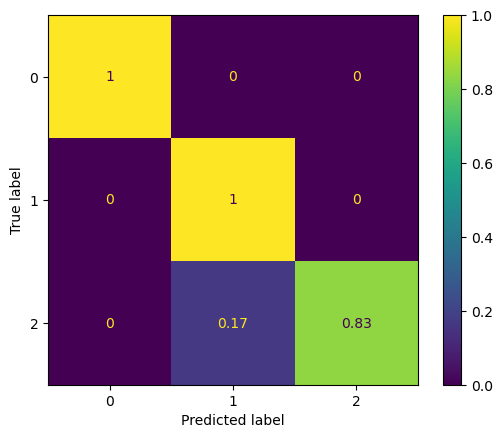

In [34]:
matriz = metrics.confusion_matrix(Y_test, preds)
tot = np.sum(matriz, axis=1, keepdims=True) 
np.set_printoptions(precision=2)
m_porc = matriz/tot
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m_porc, display_labels=[0,1,2])
disp.plot()
plt.show()

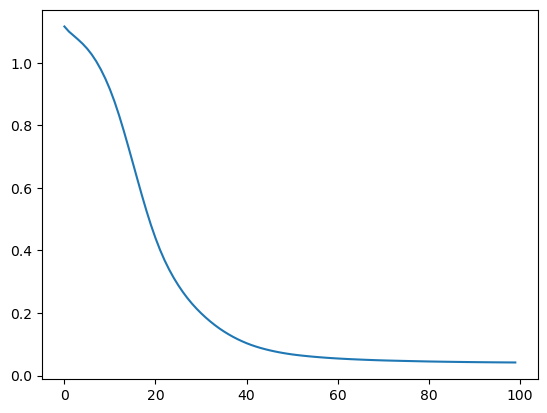

In [15]:
plt.plot(custos)

## Código MLP

In [45]:
def make_layers(cfg, in_channels = 3):
    layers = []
    for v in cfg:
        layers += [nn.Linear(in_channels, v), nn.ReLU()]
        in_channels = v
    return nn.Sequential(*layers)

In [46]:
class ModeloSkLearn(nn.Module):
    def __init__(self,entrada=4,camadas_escondidas=256 ,saida=3):
        super().__init__()
        self.hidden_layers_num = camadas_escondidas
        self.dense_hidden = make_layers(self.hidden_layers_num, entrada)
        self.fc = nn.Linear(self.hidden_layers_num[-1], saida)
        
    def forward(self, x):
        x = self.dense_hidden(x)
        x = self.fc(x)
        return x

In [47]:
def meu_fit(modelo, funcao_objetivo, otimizador, data, labels, epocas = 100):
    custos = []
    for i in range(epocas):
        # zerar os gradientes
        otimizador.zero_grad()

        # forward pass
        y_predito = modelo(data)
        custo = funcao_objetivo(y_predito, labels)

        # backward pass
        custo.backward()
        otimizador.step()

    custos.append(custo.item())
    return custos

In [48]:
def meu_predict(modelo, data):
    preds = []
    with torch.no_grad():
        for val in data:
            y_predito = modelo.forward(val)
            preds.append(y_predito.argmax().item())
    return preds

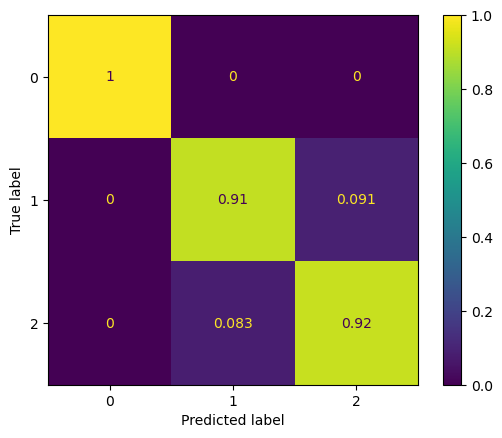

In [49]:
#X_train = torch.tensor(x_train, dtype=torch.float32)
#X_test = torch.tensor(x_test, dtype=torch.float32)
#Y_train = torch.tensor(y_train, dtype=torch.long)
#Y_test = torch.tensor(y_test, dtype=torch.long)
modelo2 = ModeloSkLearn(entrada=4, camadas_escondidas=[256, 128, 64, 32] , saida=3 )
otimizador = torch.optim.Adam(modelo2.parameters(), lr=0.01)
# treinar o modelo
meu_fit(modelo2, funcao_objetivo, otimizador, X_train, Y_train)

# avaliar o modelo
meu_predict(modelo2, X_test)

matriz = metrics.confusion_matrix(y_test, y_pred)
tot = np.sum(matriz, axis=1, keepdims=True) 
np.set_printoptions(precision=2)
m_porc = matriz/tot
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m_porc, display_labels=[0,1,2])
disp.plot()
plt.show()